In [2]:
import os
import numpy as np

import pandas as pd

In [3]:
path = os.path.join(os.path.abspath(".."), "images")
os.chdir(path)

C:\Users\gimes\source\repos\zebra_fishy\src\images


# Reading in csv files

In [4]:
df = pd.read_csv("results.csv")
df_t = pd.read_csv("result_times.csv")

# Parsing times

In [5]:
from pandas import Series
from datetime import datetime


def extract_seconds_float(row: Series, col=str):
    try:
        ms = datetime.strptime(row[col], "%H:%M:%S.%f").microsecond
        s = datetime.strptime(row[col], "%H:%M:%S.%f").second
        return float(s) + ms * 0.000001
    except:
        return 0.0


df_t["Well"] = df_t.apply(lambda row: extract_seconds_float(row, "Well"), axis=1)
df_t["Fish"] = df_t.apply(lambda row: extract_seconds_float(row, "Fish"), axis=1)
df_t["Measure"] = df_t.apply(lambda row: extract_seconds_float(row, "Measure"), axis=1)
df_t["start2end"] = df_t.apply(lambda row: extract_seconds_float(row, "start2end"), axis=1)


In [6]:
df_t["Lyuk"] = df_t.apply(lambda row: row["Well"], axis=1)
df_t["Hal"] = df_t.apply(lambda row: row.Fish, axis=1)
df_t["Mérés"] = df_t.apply(lambda row: row.Measure, axis=1)
df_t["Teljes"] = df_t.apply(lambda row: row.start2end, axis=1)

# Average and standard dev
## Well

In [7]:
avg_w, std_w = np.mean(df_t["Well"]), np.std(df_t["Well"])

print(avg_w)
print(std_w)

1.7350109513381997
0.5915052239331469


## Fish

In [8]:
avg_f, std_f = np.mean(df_t["Fish"]), np.std(df_t["Fish"])

print(avg_f)
print(std_f)

4.932065406326035
1.1061756849256799


## Measure

In [9]:
avg_m, std_m = np.mean(df_t["Measure"]), np.std(df_t["Measure"])

print(avg_m)
print(std_m)

0.028598126520681263
0.01512598603774851


## Whole process

In [10]:
avg_a, std_a = np.mean(df_t["start2end"]), np.std(df_t["start2end"])

print(avg_a)
print(std_a)

6.700862822384428
1.3071132606092943


# Pie-chart

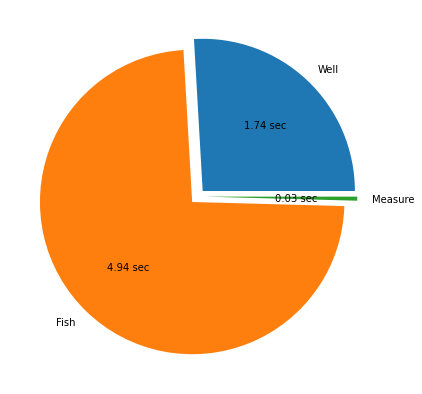

In [22]:
from matplotlib import pyplot as plt

headers = ['Lyuk', 'Hal', 'Mérés']
headers = ['Well', 'Fish', 'Measure']

avg_data = [avg_w / avg_a, avg_f / avg_a, avg_m / avg_a]


def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)


# Creating plot
fig = plt.figure(figsize=(10, 7), )
wedges, texts, autotexts = plt.pie(avg_data, labels=headers,explode = [0.05,0.05,0.05],
                                   autopct=lambda pct: f'{np.round(pct * 0.01 * avg_a, 2)} sec')  #func(pct, data))
# show plot
plt.show()

# Boxchart diagram of runtimes

Index(['Batch', 'Name', 'Well', 'Fish', 'Measure', 'start2end', 'Lyuk', 'Hal',
       'Mérés', 'Teljes'],
      dtype='object')


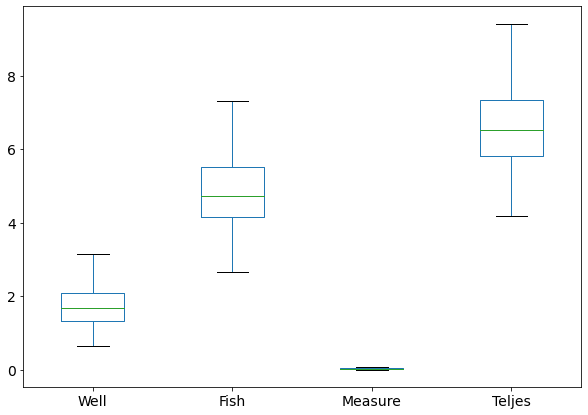

In [12]:
df_T = df_t.copy()
df_T.drop(["Batch", "Name", 'Well', 'Fish', 'Measure', 'start2end'], axis=1)
print(df_T.columns)
boxplot = df_T.boxplot(
    figsize=(10, 7),
    column=['Well', 'Fish', 'Measure', 'Teljes'],
    showfliers=False,
    grid=False,
    fontsize=14
)

In [13]:
labels = ['Well', 'Fish', 'Measure', 'start2end'],
df_avg = pd.DataFrame(
    {'Well': [avg_w, std_w], 'Fish': [avg_f, std_f], 'Measure': [avg_m, std_m], 'start2end': [avg_a, std_a]})
df_avg.to_csv("times.csv")

In [14]:
a = np.asarray(df["Has_Fish"])
good = len(a.nonzero()[0])
all = len(a)
print(f"{good} / {all}")

396 / 417
